
# <center> BITCOIN PRICE PREDICTION </center>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

In [2]:
#Reading csv file
df = pd.read_csv('bitcoin_dataset.csv')

In [3]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
df.shape

(2906, 24)

In [5]:
#Get information about data and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [6]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


### Check for missing values

In [7]:
df.isna().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [8]:
#Filling missing values with mean
df['btc_total_bitcoins']= df['btc_total_bitcoins'].fillna(df.btc_total_bitcoins.mean())
df['btc_trade_volume']= df['btc_trade_volume'].fillna(df.btc_trade_volume.mean())
df['btc_blocks_size']= df['btc_blocks_size'].fillna(df.btc_blocks_size.mean())
df['btc_median_confirmation_time']= df['btc_median_confirmation_time'].fillna(df.btc_median_confirmation_time.mean())
df['btc_difficulty']= df['btc_difficulty'].fillna(df.btc_difficulty.mean())
df['btc_transaction_fees']= df['btc_transaction_fees'].fillna(df.btc_transaction_fees.mean())

In [9]:
df.isna().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [10]:
df = df.drop('Date',axis=1)

In [12]:
#Let's check which feature has maximum corelation with our dependent feature- btc_market_price
df.corr()["btc_market_price"].sort_values(ascending = False)

btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_estimated_transaction_volume_usd                   0.968308
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916913
btc_trade_volume                                       0.868608
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806568
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674059
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
btc_n_transactions_per_block            

## Visualizing the data

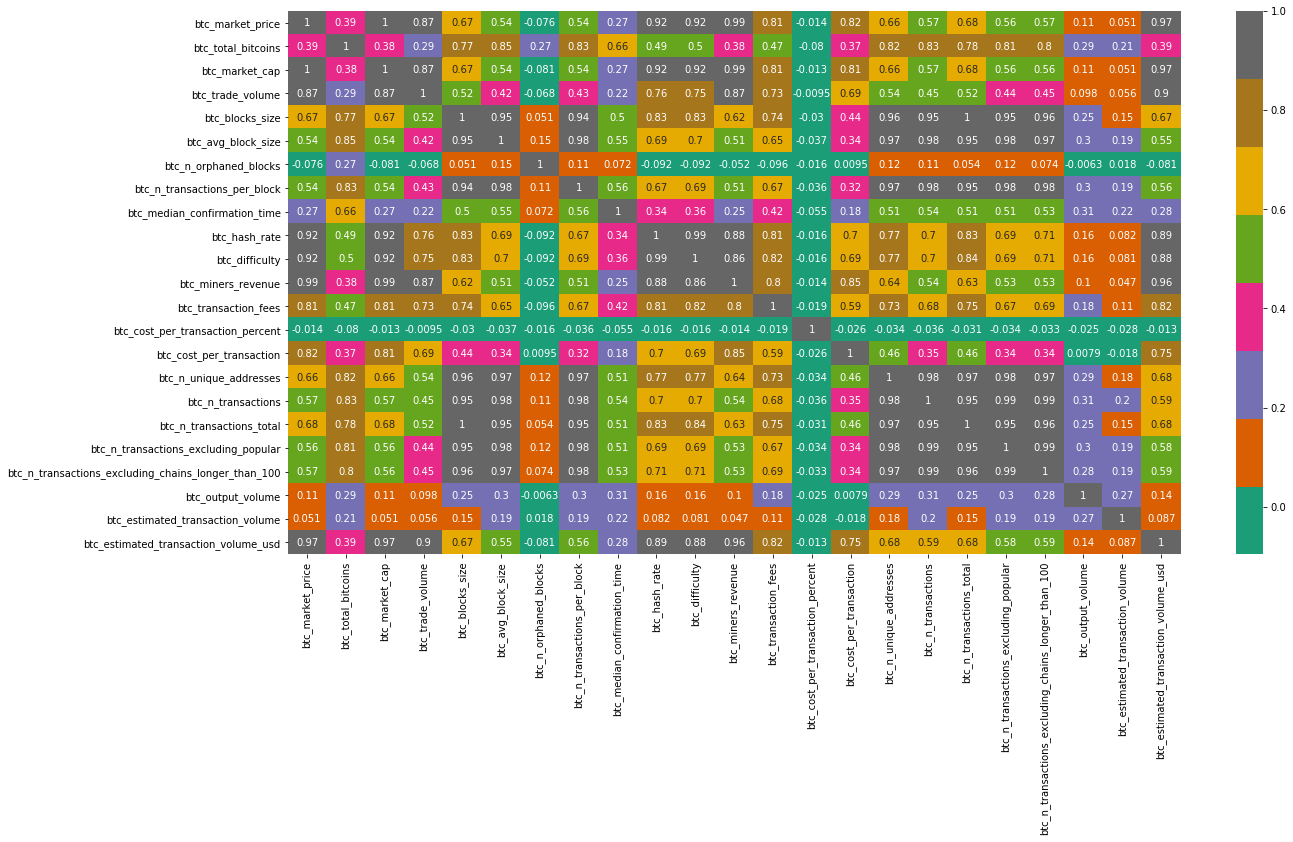

In [11]:
# Check for Corelation between Features
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(),yticklabels=True,annot=True,cbar=True,cmap='Dark2')

- Features  'btc_cost_per_transaction_percent', 'btc_n_orphaned_blocks' are negatively related to the dependent feature.
- Also, 'btc_market_price' and 'btc_market_cap' are highly related with each other.

- Correlation only checks linear relationship between features,so in order to look into further relationships,we can use scatterplots.


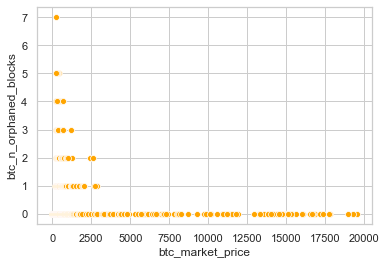

In [133]:
sb.scatterplot(data = df, x = "btc_market_price", y = "btc_n_orphaned_blocks",color='orange');

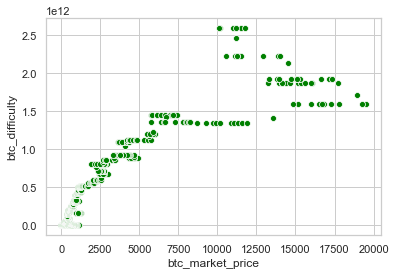

In [132]:
sb.scatterplot(data = df, x = "btc_market_price", y = "btc_difficulty",color='green');

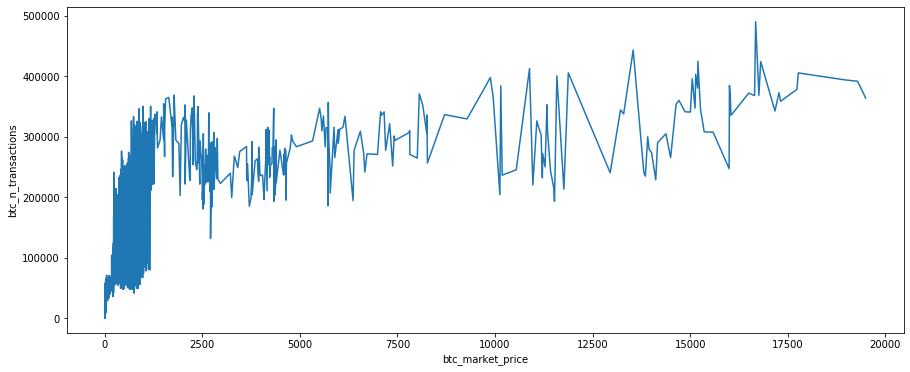

In [119]:
plt.figure(figsize=(15,6))
sb.lineplot(data = df, x = "btc_market_price", y = "btc_n_transactions");

Text(0.5, 1.0, 'Price Distribution')

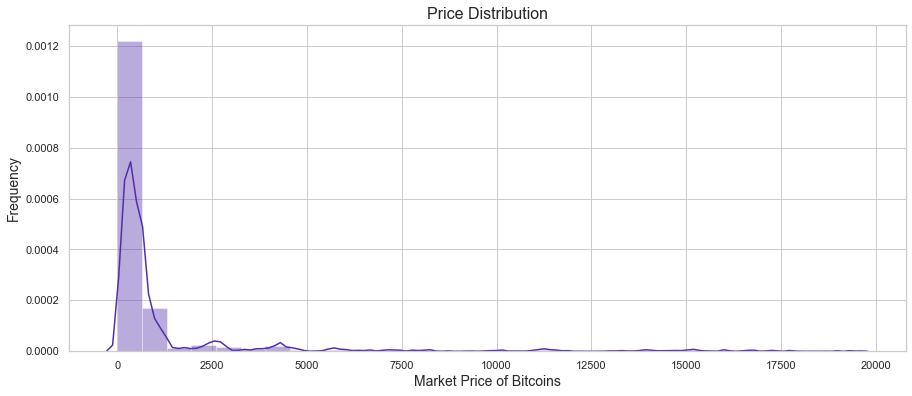

In [131]:
#PRICE DISTRIBUTION
#setting plot size
plt.figure(figsize=(15,6))
sb.set(style="whitegrid")
sb.distplot(df['btc_market_price'],bins=30,color="#512DA8")
plt.xlabel("Market Price of Bitcoins",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Price Distribution",fontsize=16)

- The distribution of dependent variable is Positively skewed.

## Feature Scaling

In [14]:
X = df.drop('btc_market_price',axis=1)
Y = df['btc_market_price']  

In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=92)  

In [16]:
# Standard scaling our data  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((2034, 22), (872, 22), (2034,), (872,))

## Model Building & Evaluation

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Y_pred = lr.predict(X_test)

In [22]:
Y_pred.shape

(872,)

In [135]:
#Using MEAN ABSOLUTE ERROR,R2 SCORE as evaluation matrix
from sklearn.metrics import mean_absolute_error,r2_score

In [138]:
mae_lr = mean_absolute_error(Y_pred,Y_test)
print('MAE for Linear Regression :',mae_lr)
r2_lr = r2_score(Y_pred,Y_test)
print('R2 SCORE for Linear Regression :',r2_lr)

MAE for Linear Regression : 13.528254050369402
R2 SCORE for Linear Regression : 0.9999301868366928


### Ridge Regression

In [142]:
# Create the Ridge model
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha = 100)
rid_reg.fit(X_train, Y_train)

Y_pred = rid_reg.predict(X_test)

# testing the model
mae_rg = mean_absolute_error(Y_pred,Y_test)
print("MSE for Ridge Regression : ",mae_rg)
r2_rg = r2_score(Y_test, Y_pred)
print('R2 SCORE for Ridge Regression : ',r2_rg)

MSE for Ridge Regression :  70.49912039211765
R2 SCORE for Ridge Regression :  0.9937744090318349


In [143]:
# Now, let's find best values for alpha and train model again
alpha_list = []
mse_list = []
for alpha_val in np.arange(0.01, 200):
    ridge1 = Ridge(alpha = alpha_val)
    ridge1.fit(X_train, Y_train)
    alpha_list.append(alpha_val)
    
    # testing the model
    Y_predict = ridge1.predict(X_test)
    mse = mean_absolute_error(Y_test, Y_predict)
    mse_list.append(mse)
    
alpha_list = pd.DataFrame(alpha_list)
mse_list = pd.DataFrame(mse_list)
alpha_mse = pd.concat([alpha_list, mse_list], axis = 1)
alpha_mse.columns = ["alpha_list", "mse_list"]

alpha_mse[alpha_mse["mse_list"] == alpha_mse["mse_list"].min()]

,alpha_list,mse_list
0,0.01,12.459064


In [144]:
#reate the Ridge model using best alpha value:
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha = 0.01)
rid_reg.fit(X_train, Y_train)

Y_pred_ridge = rid_reg.predict(X_test)

# testing the model
mae_rg = mean_absolute_error(Y_pred_ridge,Y_test)
print("MSE for Ridge Regression : ",mae_rg)
r2_rg = r2_score(Y_test, Y_pred_ridge)
print('R2 SCORE for Ridge Regression : ',r2_rg)

MSE for Ridge Regression :  12.459063500114274
R2 SCORE for Ridge Regression :  0.9999360075695055


### Lasso Regression

In [145]:
# Create Lasso model
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.02)
ls.fit(X_train, Y_train)

Y_pred_ls = ls.predict(X_test)

# testing the model
mae_ls = mean_absolute_error(Y_pred_ls,Y_test)
print("MSE for Lasso Regression : ",mae_ls)
r2_ls = r2_score(Y_test, Y_pred_ls)
print('R2 SCORE for Lasso Regression : ',r2_ls)


MSE for Lasso Regression :  13.528254050369402
R2 SCORE for Lasso Regression :  0.9999300569130946


In [146]:
# Now, let's find best values for alpha and train model again

alpha_list = []
mse_list = []
for alpha_val in np.arange(0.001, 20):
    ls1 = Lasso(alpha = alpha_val)
    ls1.fit(X_train, Y_train)
    alpha_list.append(alpha_val)
    
    # testing the model
    Y_predict = ls1.predict(X_test)
    mse = mean_absolute_error(Y_test, Y_predict)
    mse_list.append(mse)
    
alpha_list = pd.DataFrame(alpha_list)
mse_list = pd.DataFrame(mse_list)
alpha_mse = pd.concat([alpha_list, mse_list], axis = 1)
alpha_mse.columns = ["alpha_list", "mse_list"]

alpha_mse[alpha_mse["mse_list"] == alpha_mse["mse_list"].min()]

,alpha_list,mse_list
1,1.001,13.135666


In [154]:
# Create the Lasso model using best alpha value:

ls = Lasso(alpha = 1.001)
ls.fit(X_train, Y_train)

Y_pred_lasso = ls.predict(X_test)

# testing the model
mae_lasso = mean_absolute_error(Y_test, Y_pred_lasso)
print("MAE for Lasso Regression : ",mae_lasso)
r2_lasso= r2_score(Y_test, Y_pred_lasso)
print('R2 SCORE for Lasso Regression : ',r2_lasso)

MAE for Lasso Regression :  13.135666394419827
R2 SCORE for Lasso Regression :  0.9999207276179175


### Keras Deep neural network for regression

In [43]:
#Importing libraries required to build neural network
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation='relu')) # Input layer 1
model.add(Dense(10, activation='relu')) # Hidden layer 2
model.add(Dense(8, activation='relu')) # Hidden layer 3
model.add(Dense(5, activation='relu')) # Hidden layer 4
model.add(Dense(1,activation='linear')) # Output layer 
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=1000)


Epoch 1/1000
64/64 [==============================] - 5s 37ms/step - loss: 769.8954 - val_loss: 840.7940
Epoch 2/1000
64/64 [==============================] - 1s 17ms/step - loss: 818.1781 - val_loss: 812.3294
Epoch 3/1000
64/64 [==============================] - 1s 17ms/step - loss: 746.1919 - val_loss: 649.7477
Epoch 4/1000
64/64 [==============================] - 1s 15ms/step - loss: 604.4422 - val_loss: 512.1053
Epoch 5/1000
64/64 [==============================] - 1s 17ms/step - loss: 467.6733 - val_loss: 419.8587
Epoch 6/1000
64/64 [==============================] - 1s 19ms/step - loss: 383.5419 - val_loss: 278.3728
Epoch 7/1000
64/64 [==============================] - 1s 17ms/step - loss: 230.8437 - val_loss: 153.2303
Epoch 8/1000
64/64 [==============================] - 1s 15ms/step - loss: 141.5863 - val_loss: 115.5399
Epoch 9/1000
64/64 [==============================] - 1s 16ms/step - loss: 100.6734 - val_loss: 96.2875
Epoch 10/1000
64/64 [==============================] - 1

64/64 [==============================] - 1s 18ms/step - loss: 30.1997 - val_loss: 37.4062
Epoch 80/1000
64/64 [==============================] - 1s 19ms/step - loss: 31.2313 - val_loss: 34.3478
Epoch 81/1000
64/64 [==============================] - 1s 20ms/step - loss: 25.9457 - val_loss: 34.6158
Epoch 82/1000
64/64 [==============================] - 1s 19ms/step - loss: 27.5426 - val_loss: 34.0320
Epoch 83/1000
64/64 [==============================] - 1s 18ms/step - loss: 26.7112 - val_loss: 33.4889
Epoch 84/1000
64/64 [==============================] - 1s 20ms/step - loss: 29.7831 - val_loss: 34.0180
Epoch 85/1000
64/64 [==============================] - 1s 16ms/step - loss: 28.7265 - val_loss: 36.0789
Epoch 86/1000
64/64 [==============================] - 1s 15ms/step - loss: 29.7323 - val_loss: 33.3588
Epoch 87/1000
64/64 [==============================] - 1s 15ms/step - loss: 25.9381 - val_loss: 32.3980
Epoch 88/1000
64/64 [==============================] - 1s 16ms/step - loss: 27

64/64 [==============================] - 1s 18ms/step - loss: 16.3472 - val_loss: 22.3415
Epoch 158/1000
64/64 [==============================] - 1s 15ms/step - loss: 16.3680 - val_loss: 21.1507
Epoch 159/1000
64/64 [==============================] - 1s 15ms/step - loss: 16.1140 - val_loss: 20.7998
Epoch 160/1000
64/64 [==============================] - 1s 15ms/step - loss: 17.2684 - val_loss: 21.5231
Epoch 161/1000
64/64 [==============================] - 1s 15ms/step - loss: 16.9166 - val_loss: 21.5866
Epoch 162/1000
64/64 [==============================] - 1s 19ms/step - loss: 15.6744 - val_loss: 20.0446
Epoch 163/1000
64/64 [==============================] - 1s 15ms/step - loss: 15.6215 - val_loss: 20.8426
Epoch 164/1000
64/64 [==============================] - 1s 18ms/step - loss: 14.1853 - val_loss: 20.5487
Epoch 165/1000
64/64 [==============================] - 1s 18ms/step - loss: 14.1618 - val_loss: 20.2611
Epoch 166/1000
64/64 [==============================] - 1s 21ms/step -

64/64 [==============================] - 1s 15ms/step - loss: 11.2322 - val_loss: 16.0323
Epoch 235/1000
64/64 [==============================] - 1s 18ms/step - loss: 11.7699 - val_loss: 15.3576
Epoch 236/1000
64/64 [==============================] - 1s 23ms/step - loss: 12.4334 - val_loss: 14.6960
Epoch 237/1000
64/64 [==============================] - 1s 21ms/step - loss: 13.6959 - val_loss: 14.7905
Epoch 238/1000
64/64 [==============================] - 1s 16ms/step - loss: 12.8278 - val_loss: 14.8641
Epoch 239/1000
64/64 [==============================] - 1s 23ms/step - loss: 12.1070 - val_loss: 15.6270
Epoch 240/1000
64/64 [==============================] - 1s 20ms/step - loss: 11.4754 - val_loss: 15.2374
Epoch 241/1000
64/64 [==============================] - 1s 20ms/step - loss: 10.7447 - val_loss: 14.7185
Epoch 242/1000
64/64 [==============================] - 1s 18ms/step - loss: 11.3891 - val_loss: 15.3431
Epoch 243/1000
64/64 [==============================] - 1s 17ms/step -

64/64 [==============================] - 1s 18ms/step - loss: 10.6399 - val_loss: 12.8511
Epoch 313/1000
64/64 [==============================] - 1s 24ms/step - loss: 10.6389 - val_loss: 13.5536
Epoch 314/1000
64/64 [==============================] - 1s 14ms/step - loss: 10.3790 - val_loss: 12.4177
Epoch 315/1000
64/64 [==============================] - 1s 16ms/step - loss: 9.5024 - val_loss: 13.4874
Epoch 316/1000
64/64 [==============================] - 1s 16ms/step - loss: 9.6465 - val_loss: 16.6412
Epoch 317/1000
64/64 [==============================] - 1s 16ms/step - loss: 11.1444 - val_loss: 12.5919
Epoch 318/1000
64/64 [==============================] - 1s 15ms/step - loss: 9.8946 - val_loss: 12.3883
Epoch 319/1000
64/64 [==============================] - 1s 15ms/step - loss: 10.4692 - val_loss: 12.5969
Epoch 320/1000
64/64 [==============================] - 1s 16ms/step - loss: 9.2812 - val_loss: 12.3543
Epoch 321/1000
64/64 [==============================] - 1s 17ms/step - los

64/64 [==============================] - 1s 18ms/step - loss: 9.4835 - val_loss: 10.8949
Epoch 391/1000
64/64 [==============================] - 1s 17ms/step - loss: 8.9483 - val_loss: 10.8465
Epoch 392/1000
64/64 [==============================] - 1s 16ms/step - loss: 8.3377 - val_loss: 11.4581
Epoch 393/1000
64/64 [==============================] - 1s 17ms/step - loss: 10.5116 - val_loss: 11.3941
Epoch 394/1000
64/64 [==============================] - 1s 19ms/step - loss: 8.5769 - val_loss: 11.2603
Epoch 395/1000
64/64 [==============================] - 1s 19ms/step - loss: 9.4237 - val_loss: 13.4351
Epoch 396/1000
64/64 [==============================] - 1s 21ms/step - loss: 8.5891 - val_loss: 11.6243
Epoch 397/1000
64/64 [==============================] - 1s 20ms/step - loss: 9.1522 - val_loss: 12.9129
Epoch 398/1000
64/64 [==============================] - 2s 28ms/step - loss: 9.6005 - val_loss: 11.5276
Epoch 399/1000
64/64 [==============================] - 1s 18ms/step - loss: 8

Epoch 469/1000
64/64 [==============================] - 1s 19ms/step - loss: 8.7861 - val_loss: 15.2801
Epoch 470/1000
64/64 [==============================] - 1s 21ms/step - loss: 9.1734 - val_loss: 10.4653
Epoch 471/1000
64/64 [==============================] - 1s 16ms/step - loss: 8.5578 - val_loss: 10.9912
Epoch 472/1000
64/64 [==============================] - 1s 16ms/step - loss: 8.0729 - val_loss: 10.8619
Epoch 473/1000
64/64 [==============================] - 1s 15ms/step - loss: 9.3101 - val_loss: 9.9008
Epoch 474/1000
64/64 [==============================] - 1s 19ms/step - loss: 8.6041 - val_loss: 11.9242
Epoch 475/1000
64/64 [==============================] - 1s 19ms/step - loss: 7.8482 - val_loss: 10.4160
Epoch 476/1000
64/64 [==============================] - 1s 16ms/step - loss: 7.8553 - val_loss: 9.7948
Epoch 477/1000
64/64 [==============================] - 1s 20ms/step - loss: 7.6988 - val_loss: 9.6482
Epoch 478/1000
64/64 [==============================] - 1s 21ms/ste

64/64 [==============================] - 1s 17ms/step - loss: 8.5316 - val_loss: 9.8827
Epoch 548/1000
64/64 [==============================] - 1s 19ms/step - loss: 6.8782 - val_loss: 9.9046
Epoch 549/1000
64/64 [==============================] - 1s 21ms/step - loss: 7.7892 - val_loss: 9.0736
Epoch 550/1000
64/64 [==============================] - 1s 23ms/step - loss: 7.9717 - val_loss: 9.7130
Epoch 551/1000
64/64 [==============================] - 2s 30ms/step - loss: 6.8847 - val_loss: 11.5791
Epoch 552/1000
64/64 [==============================] - 2s 33ms/step - loss: 8.4669 - val_loss: 9.08820s - loss: 8.591 - ETA: 0s - loss: 8. - ETA: 0s - loss:  - ETA: 0s - loss: 8.4
Epoch 553/1000
64/64 [==============================] - 1s 23ms/step - loss: 6.5217 - val_loss: 9.6720
Epoch 554/1000
64/64 [==============================] - 1s 21ms/step - loss: 7.7189 - val_loss: 9.7460
Epoch 555/1000
64/64 [==============================] - 1s 17ms/step - loss: 7.4751 - val_loss: 9.7039
Epoch 556

64/64 [==============================] - 2s 29ms/step - loss: 6.9576 - val_loss: 9.0769: 0s - los
Epoch 625/1000
64/64 [==============================] - 2s 35ms/step - loss: 6.3893 - val_loss: 8.5866s - loss: 6.
Epoch 626/1000
64/64 [==============================] - 2s 38ms/step - loss: 6.8134 - val_loss: 9.5657
Epoch 627/1000
64/64 [==============================] - 3s 43ms/step - loss: 7.3697 - val_loss: 10.7525
Epoch 628/1000
64/64 [==============================] - 2s 29ms/step - loss: 8.5984 - val_loss: 8.5537
Epoch 629/1000
64/64 [==============================] - 1s 22ms/step - loss: 6.4934 - val_loss: 8.2421
Epoch 630/1000
64/64 [==============================] - 1s 23ms/step - loss: 7.1023 - val_loss: 10.0255
Epoch 631/1000
64/64 [==============================] - 1s 21ms/step - loss: 7.5357 - val_loss: 8.2020
Epoch 632/1000
64/64 [==============================] - 1s 18ms/step - loss: 6.9238 - val_loss: 10.7910
Epoch 633/1000
64/64 [==============================] - 1s 14ms

Epoch 703/1000
64/64 [==============================] - 1s 23ms/step - loss: 8.8829 - val_loss: 8.7456
Epoch 704/1000
64/64 [==============================] - 2s 26ms/step - loss: 7.7675 - val_loss: 9.8046
Epoch 705/1000
64/64 [==============================] - 2s 25ms/step - loss: 6.6183 - val_loss: 8.9636
Epoch 706/1000
64/64 [==============================] - 2s 27ms/step - loss: 6.8737 - val_loss: 10.0519
Epoch 707/1000
64/64 [==============================] - 2s 29ms/step - loss: 7.8176 - val_loss: 10.2353 ETA: 0s - 
Epoch 708/1000
64/64 [==============================] - 2s 29ms/step - loss: 7.6717 - val_loss: 10.4082
Epoch 709/1000
64/64 [==============================] - 2s 26ms/step - loss: 7.3253 - val_loss: 9.1789
Epoch 710/1000
64/64 [==============================] - 1s 22ms/step - loss: 6.8335 - val_loss: 8.6072
Epoch 711/1000
64/64 [==============================] - 1s 21ms/step - loss: 7.0331 - val_loss: 10.0203
Epoch 712/1000
64/64 [==============================] - 1s

64/64 [==============================] - 1s 19ms/step - loss: 6.3128 - val_loss: 9.1639
Epoch 782/1000
64/64 [==============================] - 1s 23ms/step - loss: 7.4465 - val_loss: 8.5511
Epoch 783/1000
64/64 [==============================] - 1s 20ms/step - loss: 6.5378 - val_loss: 8.9422- ETA: 0s - lo
Epoch 784/1000
64/64 [==============================] - 1s 21ms/step - loss: 6.0657 - val_loss: 8.0572
Epoch 785/1000
64/64 [==============================] - 1s 19ms/step - loss: 7.1470 - val_loss: 8.0787
Epoch 786/1000
64/64 [==============================] - 1s 15ms/step - loss: 7.0745 - val_loss: 8.1299
Epoch 787/1000
64/64 [==============================] - 1s 13ms/step - loss: 6.1091 - val_loss: 8.4476
Epoch 788/1000
64/64 [==============================] - 2s 34ms/step - loss: 7.2661 - val_loss: 10.1651
Epoch 789/1000
64/64 [==============================] - 1s 23ms/step - loss: 6.1587 - val_loss: 8.2087
Epoch 790/1000
64/64 [==============================] - 1s 22ms/step - lo

64/64 [==============================] - 2s 24ms/step - loss: 6.5421 - val_loss: 7.2240
Epoch 861/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.4903 - val_loss: 8.7850
Epoch 862/1000
64/64 [==============================] - 1s 15ms/step - loss: 6.5303 - val_loss: 10.9640
Epoch 863/1000
64/64 [==============================] - 1s 15ms/step - loss: 7.2597 - val_loss: 8.6723
Epoch 864/1000
64/64 [==============================] - 1s 16ms/step - loss: 6.2623 - val_loss: 7.3903
Epoch 865/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.8076 - val_loss: 9.6492
Epoch 866/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.7885 - val_loss: 10.5991
Epoch 867/1000
64/64 [==============================] - 1s 15ms/step - loss: 7.1456 - val_loss: 7.6035
Epoch 868/1000
64/64 [==============================] - 1s 15ms/step - loss: 5.9456 - val_loss: 11.9048
Epoch 869/1000
64/64 [==============================] - 1s 17ms/step - loss: 8.5713 -

64/64 [==============================] - 1s 16ms/step - loss: 5.7548 - val_loss: 7.3884
Epoch 940/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.7957 - val_loss: 7.9975
Epoch 941/1000
64/64 [==============================] - 1s 20ms/step - loss: 5.6393 - val_loss: 7.7146
Epoch 942/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.8520 - val_loss: 7.6076
Epoch 943/1000
64/64 [==============================] - 1s 19ms/step - loss: 5.4723 - val_loss: 7.1971s - loss: 5.468
Epoch 944/1000
64/64 [==============================] - 1s 22ms/step - loss: 4.8840 - val_loss: 7.7695
Epoch 945/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.7183 - val_loss: 7.3264
Epoch 946/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.5278 - val_loss: 7.1842
Epoch 947/1000
64/64 [==============================] - 1s 16ms/step - loss: 5.1774 - val_loss: 10.3357
Epoch 948/1000
64/64 [==============================] - 1s 17ms/step - l

In [44]:
Y_pred_net = model.predict(X_test)

In [148]:
mae_net = mean_absolute_error(Y_pred_net,Y_test)
print('MAE FOR NEURAL NETWORK :',mae_net)
r2_net = r2_score(Y_pred_net,Y_test)
print('R2 SCORE FOR NEURAL NETWORK :',r2_net)

MAE FOR NEURAL NETWORK : 9.028033526930026
R2 SCORE FOR NEURAL NETWORK : 0.9999308611685495


### After building different models, let's compare it and find best fit model :

In [157]:
models = pd.DataFrame({
    'Regression Model': ['Linear Regression','Ridge Regression','Lasso Regression','Neural Network'],
    'MAE Score': [
        mae_lr, 
        mae_rg,
        mae_lasso,
        mae_net] ,
    'R2 Score': [
        r2_lr, 
        r2_rg,
        r2_lasso,
        r2_net]})
print("--- MODEL EVALUATION---")
models.sort_values(by='MAE Score', ascending=True)

--- MODEL EVALUATION---


,Regression Model,MAE Score,R2 Score
3,Neural Network,9.028034,0.999931
1,Ridge Regression,12.459064,0.999936
2,Lasso Regression,13.135666,0.999921
0,Linear Regression,13.528254,0.999930


- Here we can see that R2 Score is almost same for all the models, but Mean Absolute Error is lowest for neural network Model.

### Neural Network is best fit for predicting bitcoin price,let's visualize its results.

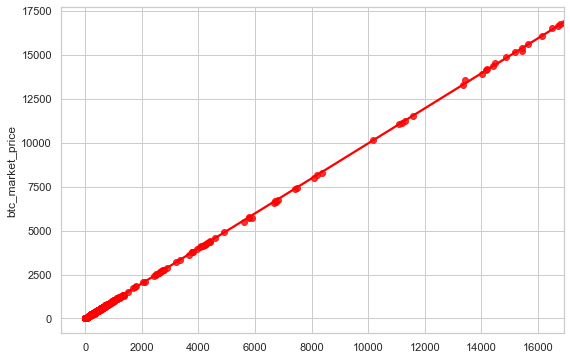

In [160]:
#Creating regression plot to visualize the model performance
plt.figure(figsize=(9,6))
sb.regplot(Y_pred_net,Y_test,color='red')

In [104]:
plot_df = pd.DataFrame({'pred':Y_pred_net.flatten() , 'actual':Y_test})

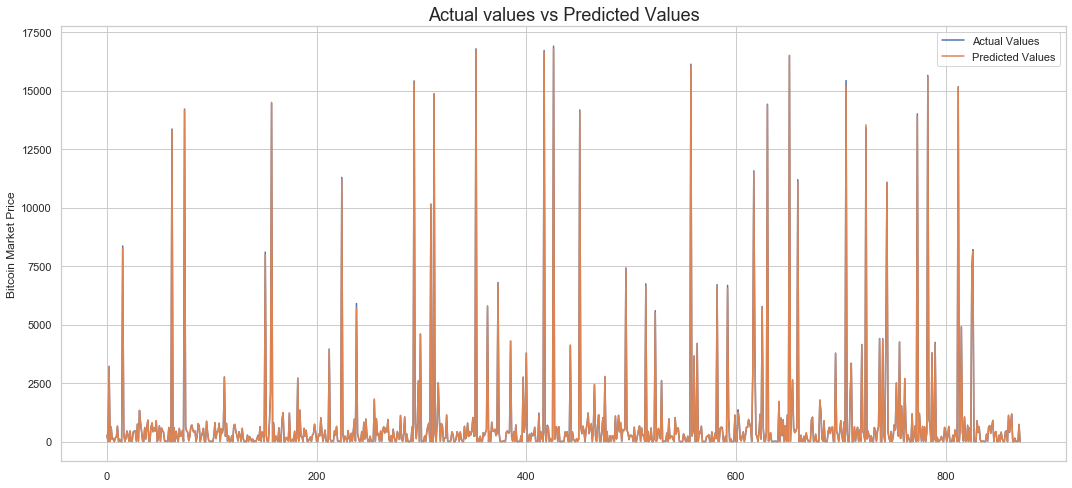

In [163]:
#Creating plot for actual vs Predicted values
plt.figure(figsize=(18,8))
plt.plot(plot_df['pred'].tolist(), label='Actual Values')
plt.plot(plot_df['actual'].tolist(), label='Predicted Values')
plt.ylabel('Bitcoin Market Price')
plt.title('Actual values vs Predicted Values',fontsize=18)
plt.legend()
plt.show()